In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

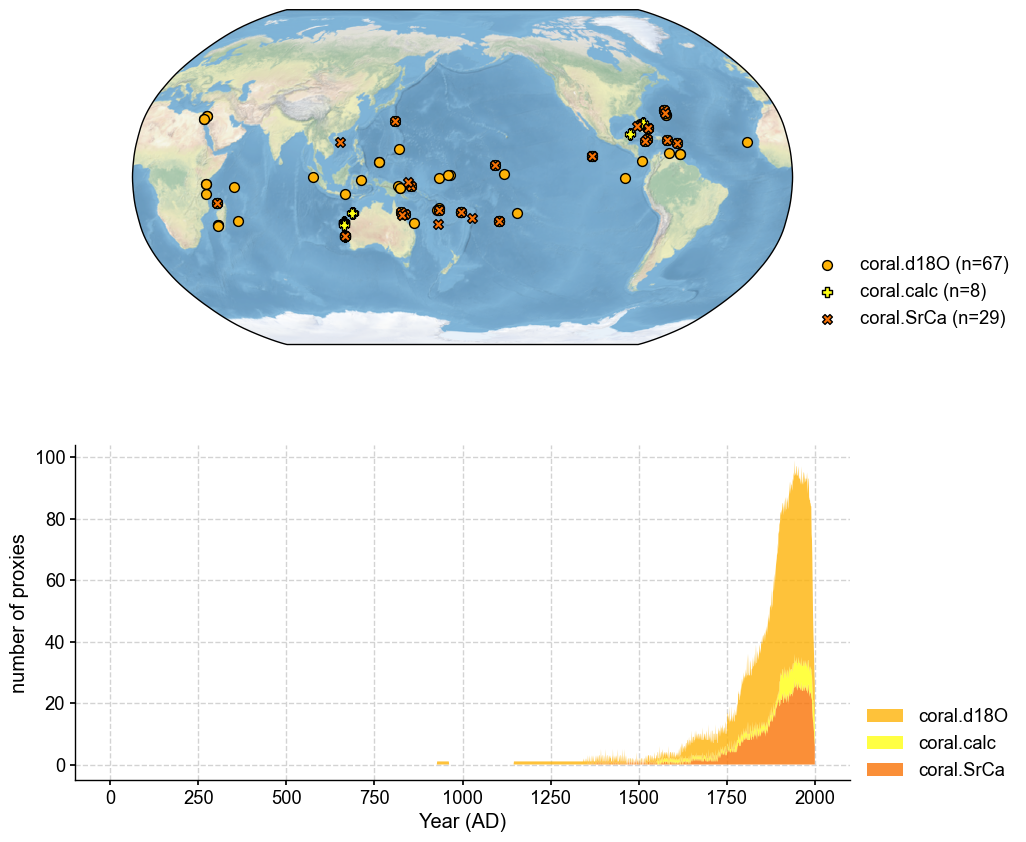

In [3]:
job.filter_proxydb(by='ptype', keys=['coral'])
fig, ax = job.proxydb.plot(plot_count=True)

In [4]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'])

Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:05<00:00, 19.31it/s]


In [5]:
job.center_proxydb(verbose=True)

>>> job.configs["proxydb_center_ref_period"] = [1951, 1980]


Centering each of the ProxyRecord:   0%|          | 0/104 [00:00<?, ?it/s]/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Centering each of the ProxyRecord: 100%|██████████| 104/104 [00:00<00:00, 2142.09it/s]

>>> job.proxydb updated


In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': 'gistemp1200_GHCNv4_ERSSTv5'}
>>> job.configs["obs_rename_dict"] = {'tas': 'tempanomaly'}
>>> job.configs["obs_anom_period"] = (1951, 1980)
>>> job.configs["obs_lat_name"] = lat
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...
>>> obs variables ['tas'] loaded
>>> job.obs created


In [7]:
job.annualize_clim(tag='obs', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='obs', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='obs', lat_min=-25, lat_max=25, lon_min=120, lon_max=280, verbose=True)

>>> job.configs["obs_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.obs updated
>>> job.configs["obs_regrid_nlat"] = 42
>>> job.configs["obs_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["prior_lat_min"] = -25
>>> job.configs["prior_lat_max"] = 25
>>> job.configs["prior_lon_min"] = 120
>>> job.configs["prior_lon_max"] = 280
>>> Processing tas ...


In [8]:
job.prep_graphem(
    recon_period=(1801, 2000),  # period to reconstruct
    calib_period=(1901, 2000),  # period for calibration
    verbose=True,
)

>>> job.configs["recon_period"] = (1801, 2000)
>>> job.configs["recon_timescale"] = 1
>>> job.configs["calib_period"] = (1901, 2000)
>>> job.graphem_params["recon_time"] created
>>> job.graphem_params["calib_time"] created
>>> job.graphem_params["field_obs"] created
>>> job.graphem_params["calib_idx"] created
>>> job.graphem_params["field"] created
>>> job.graphem_params["df_proxy"] created
>>> job.graphem_params["proxy"] created
>>> job.graphem_params["lonlat"] created


In [9]:
%%time

job.run_graphem(
    save_dirpath='./recons/graphem-real-pages2k',
    graph_method='neighborhood',
    cutoff_radius=1500,
    verbose=True,
)

>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["save_dirpath"] = ./recons/graphem-real-pages2k
>>> job.configs["save_filename"] = job_r01_recon.nc
Computing a neighborhood graph with R = 1500.0 km
Estimating graph using neighborhood method
Running GraphEM:



EM | dXmis: 0.0040; rdXmis: 0.0045:  22%|██▏       | 43/200 [00:57<03:28,  1.33s/it]


GraphEM.EM(): Tolerance achieved.
job.graphem_solver created and saved to: None
>>> job.recon_fields created
>>> Reconstructed fields saved to: ./recons/graphem-real-pages2k/job_r01_recon.nc
CPU times: user 58.6 s, sys: 53.6 ms, total: 58.6 s
Wall time: 58.9 s


In [10]:
res = cfr.ReconRes('./recons/graphem-real-pages2k')
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [11]:
target = cfr.ClimateField().fetch('20CRv3/tas', vn='air').rename('tas').get_anom((1951, 1980))

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


In [12]:
target = target.annualize(months=[12, 1, 2]).crop(lat_min=-25, lat_max=25, lon_min=120, lon_max=280)
target.da

<xarray.DataArray 'tas' (time: 181, lat: 51, lon: 161)>
array([[[ 7.12051392e-01,  7.51327515e-01,  7.71530151e-01, ...,
         -1.31536865e+00, -1.34703064e+00, -1.31349182e+00],
        [ 8.04306030e-01,  8.38195801e-01,  8.73229980e-01, ...,
         -1.31643677e+00, -1.31268311e+00, -1.25651550e+00],
        [ 9.09240723e-01,  9.38842773e-01,  9.73342896e-01, ...,
         -1.29013062e+00, -1.27444458e+00, -1.23995972e+00],
        ...,
        [-1.16390991e+00, -7.60192871e-01, -9.34967041e-01, ...,
         -4.77157593e-01, -4.26986694e-01, -3.75610352e-01],
        [-1.27702332e+00, -4.75357056e-01, -5.90957642e-01, ...,
         -5.08804321e-01, -4.44946289e-01, -3.65203857e-01],
        [-1.03024292e+00, -4.00482178e-01, -2.10403442e-01, ...,
         -6.50222778e-01, -5.75698853e-01, -4.56192017e-01]],

       [[ 1.08757532e+00,  1.10603845e+00,  1.11289465e+00, ...,
         -1.18009436e+00, -1.19332886e+00, -1.18440759e+00],
        [ 1.17424524e+00,  1.20643103e+00,  1.24220788e+00, ...,
         -1.15189612e+00, -1.14566040e+00, -1.13297522e+00],
        [ 1.24724329e+00,  1.28641760e+00,  1.32091272e+00, ...,
         -1.11776733e+00, -1.12101233e+00, -1.11575317e+00],
...
          7.38657653e-01,  7.53977478e-01,  7.16705322e-01],
        [ 4.82248932e-01,  1.03464760e-01, -1.23087561e-03, ...,
          6.17258728e-01,  6.88018799e-01,  7.53031433e-01],
        [ 4.86429840e-01,  3.02886963e-01,  1.41306564e-01, ...,
          5.16072571e-01,  7.08953857e-01,  8.24442565e-01]],

       [[ 2.22808838e+00,  2.30035400e+00,  2.20330811e+00, ...,
         -3.21807861e-01, -2.90283203e-01, -2.43103027e-01],
        [ 2.42138672e+00,  2.58438110e+00,  2.50640869e+00, ...,
         -2.47192383e-01, -1.84692383e-01, -1.41296387e-01],
        [ 2.31777954e+00,  2.44546509e+00,  2.40731812e+00, ...,
         -1.45141602e-01, -1.35803223e-01, -1.28204346e-01],
        ...,
        [ 1.58810425e+00,  1.87197876e+00,  1.90826416e+00, ...,
          2.72021484e+00,  2.83673096e+00,  2.79467773e+00],
        [ 1.34408569e+00,  1.58560181e+00,  1.73516846e+00, ...,
          2.59796143e+00,  2.60137939e+00,  2.54006958e+00],
        [ 1.03088379e+00,  1.15402222e+00,  1.36544800e+00, ...,
          3.04537964e+00,  3.14715576e+00,  2.92916870e+00]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -25.0 -24.0 -23.0 -22.0 -21.0 ... 22.0 23.0 24.0 25.0
  * lon      (lon) float32 120.0 121.0 122.0 123.0 ... 277.0 278.0 279.0 280.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes:
    annualized:  1

/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


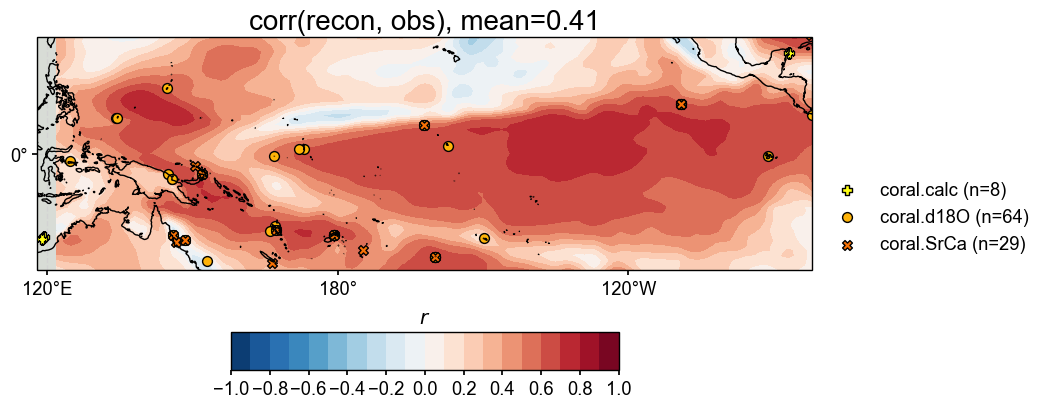

Figure saved at: "figs/graphem_corr_recon_obs.pdf"


In [13]:
# validate the reconstruction against 20CR
stat = 'corr'

valid_fd = res.recons['tas'].compare(
    target, stat=stat,
    timespan=(1874, 1900),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-24, 24, 118, 278),
    plot_cbar=True,
    plot_proxydb=True, proxydb=job.proxydb,
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/graphem_{stat}_recon_obs.pdf')

In [14]:
target_nino34 = target.index('nino3.4')

<Axes: xlabel='Year (CE)'>

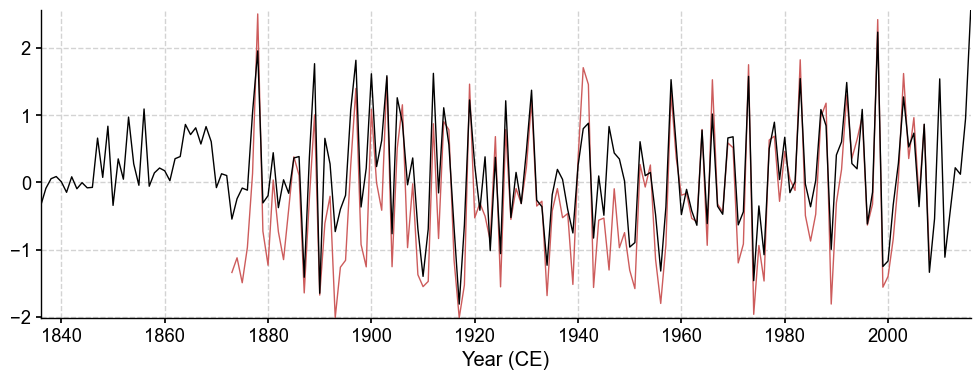

In [15]:
bc09 = cfr.EnsTS().fetch('BC09_NINO34')
bc09_ann = bc09.annualize(months=[12, 1, 2])
fig, ax = bc09_ann.plot()
target_nino34.plot(ax=ax, color='k')

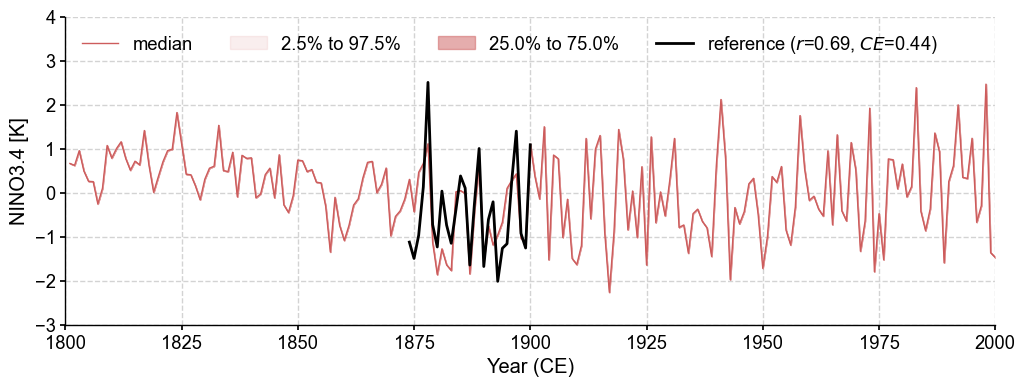

Figure saved at: "figs/graphem_corr_recon_BC09.pdf"


In [18]:
fig, ax = res.recons['nino3.4'].compare(bc09_ann, timespan=(1874, 1900)).plot_qs()
ax.set_xlim(1800, 2000)
ax.set_ylim(-3, 4)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, f'./figs/graphem_corr_recon_BC09.pdf')